Import Library

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Membaca Data dari Google Spreadsheet

In [71]:
data = pd.read_csv("dataKasus-1.csv")
print("Data Overview:")
# Menampilkan data teratas
data.head()

Data Overview:


,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12
0,1.0,NAMA 1,23 TH,3.0,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,NaN
1,2.0,NAMA 2,29 TH,2.0,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE,NaN
2,3.0,NAMA 3,20 TH,1.0,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
3,4.0,NAMA 4,18 TH,1.0,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
4,5.0,NAMA 5,34 TH,3.0,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN


Eksplorasi Data (Exploratory Data Analysis - EDA)

In [72]:
# Mengecek dimensi data dan informasi dasar
print("Dimensi data:", data.shape)
data.info()

# Mengecek nilai yang hilang
print("Jumlah missing values per kolom:")
print(data.isnull().sum())

Dimensi data: (562, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NO                                561 non-null    float64
 1   NAMA                              561 non-null    object 
 2   USIA                              558 non-null    object 
 3   PARITAS                           561 non-null    float64
 4   JARAK KELAHIRAN                   554 non-null    object 
 5   RIW HIPERTENSI                    561 non-null    object 
 6   RIW PE                            561 non-null    object 
 7   OBESITAS                          561 non-null    object 
 8   RIW DM                            561 non-null    object 
 9   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object 
 10  SOSEK RENDAH                      561 non-null    object 
 11  PE/Non PE                         561 non-null 

In [73]:
print("\nDescriptive Statistics:")
data.describe()


Descriptive Statistics:


,NO,PARITAS
count,561.000000,561.000000
mean,281.859180,1.709447
std,162.301009,1.012105
min,1.000000,0.000000
25%,142.000000,1.000000
50%,282.000000,2.000000
75%,422.000000,2.000000
max,562.000000,6.000000


Penanganan Missing Values

In [74]:
# Menghapus missing values
data_cleaned = data.dropna()

# Mengecek ulang data setelah pembersihan
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 11 to 554
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NO                                9 non-null      float64
 1   NAMA                              9 non-null      object 
 2   USIA                              9 non-null      object 
 3   PARITAS                           9 non-null      float64
 4   JARAK KELAHIRAN                   9 non-null      object 
 5   RIW HIPERTENSI                    9 non-null      object 
 6   RIW PE                            9 non-null      object 
 7   OBESITAS                          9 non-null      object 
 8   RIW DM                            9 non-null      object 
 9   RIW HIPERTENSI/PE DALAM KELUARGA  9 non-null      object 
 10  SOSEK RENDAH                      9 non-null      object 
 11  PE/Non PE                         9 non-null      object 
 12  Unnamed: 12   

Normalisasi Data

In [75]:
# Normalisasi data numerik menggunakan Min-Max Scaler
scaler = MinMaxScaler()
numerical_columns = data_cleaned.select_dtypes(include=[np.number]).columns
data_scaled = scaler.fit_transform(data_cleaned[numerical_columns])

# Konversi hasil normalisasi kembali ke DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=numerical_columns)

# Menampilkan data setelah normalisasi
data_scaled.head()

,NO,PARITAS
0,0.000000,0.0
1,0.031250,0.5
2,0.295956,0.0
3,0.400735,0.0
4,0.786765,0.0


Visualisasi Data

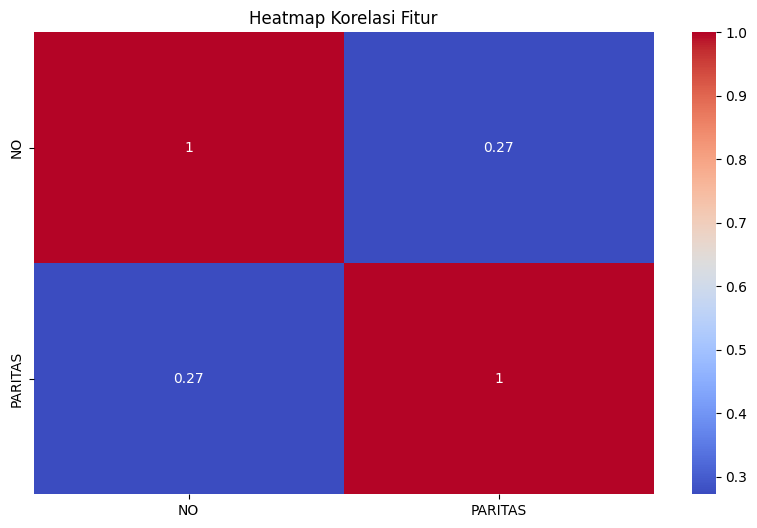

In [76]:
# Visualisasi korelasi antar fitur menggunakan heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pd.DataFrame(data_scaled).corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur")
plt.show()

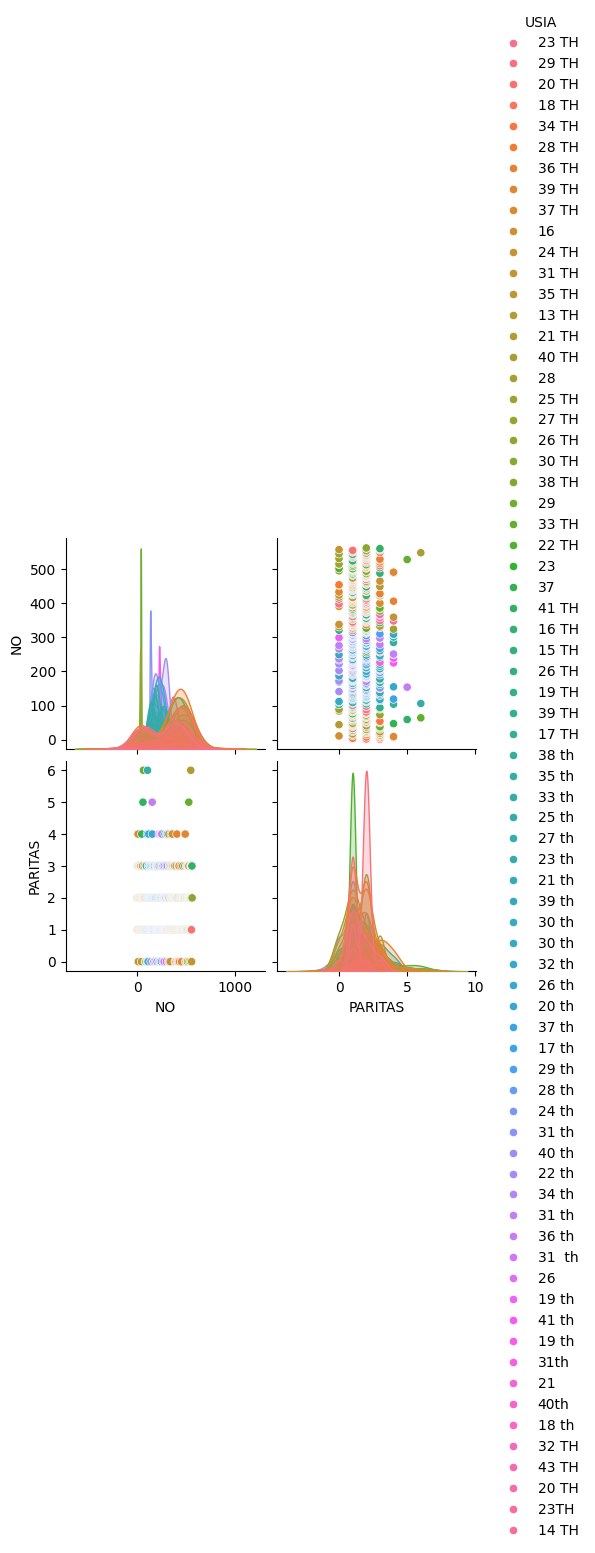

In [77]:
sns.pairplot(data, hue='USIA')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


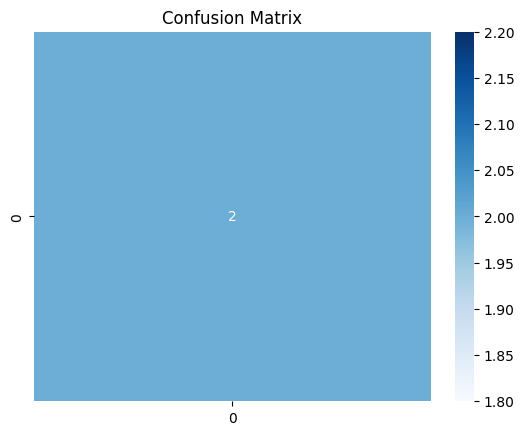

In [84]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Mempersiapkan Data untuk Pemodelan

In [85]:
# Membagi data menjadi fitur (X) dan target (y)
X = data_scaled.iloc[:, :-1]  # Semua kolom kecuali kolom target
y = data_cleaned.iloc[:, -1]  # Kolom target (label)

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Normalisasi data dengan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Pemodelan dengan Algoritma K-Nearest Neighbors (KNN)

In [87]:
# Membuat model KNN dan melatihnya
knn = KNeighborsClassifier(n_neighbors=5)  # Menggunakan 5 tetangga terdekat
knn.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = knn.predict(X_test)

Evaluasi Model

In [88]:
# Evaluasi model menggunakan akurasi dan classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy * 100:.2f}%")

# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi model: 100.00%
Laporan Klasifikasi:
              precision    recall  f1-score   support

      HT Ges       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

